# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>


---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Nian-Ya, Weng"
student_id = "25176165"
group_id = "30"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to assist NBA teams in identifying college basketball players who are most likely to be drafted. By building a predictive model using historical player statistics, teams can make more informed scouting decisions and better allocate their resources. This tool can also support media and fan engagement platforms that predict player drafts, enhancing audience interaction and content value.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
Accurate predictions can significantly improve the efficiency and success of NBA teams' draft strategies by identifying high-potential players early, reducing scouting costs, and increasing the return on investment in drafted players. It can also enhance fan engagement and media analytics products by providing more reliable draft forecasts.

On the other hand, incorrect predictions may lead to poor draft choices, missed opportunities to recruit strong players, wasted resources on ineffective scouting, and reduced confidence in analytics-driven decision-making within the organization.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results of the predictions will be used to support NBA team management, scouts, and analysts in making informed draft decisions. The primary users of the predictions will be the team's data analytics departments and decision-makers involved in the player selection process.

Other stakeholders impacted by the predictions include players—whose draft chances and career opportunities may be affected—, media platforms that use such data for public draft forecasts, and fans who follow and engage with draft-related content. Accurate predictions are expected to improve trust in analytics and enhance engagement across these stakeholders.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# <Student to fill this section>

import os
import pandas as pd
from pathlib import Path

# check if you are in the Colab environment
IN_COLAB = "google.colab" in str(get_ipython())

# automatically set the path
if IN_COLAB:
    from google.colab import files
    print("Colab detected. Please upload your 'train.csv' and 'test.csv' files.")
    uploaded = files.upload()
    PATH_TRAIN = "train.csv"
    PATH_TEST = "test.csv"
else:
    PATH_TRAIN = Path("data/raw/train.csv")
    PATH_TEST = Path("data/raw/test.csv")

# load data
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

# show basic information
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Columns in Train:", train.columns.tolist())

# display data
display(train.head())

Colab detected. Please upload your 'train.csv' and 'test.csv' files.


Saving test.csv to test.csv
Saving train.csv to train.csv
Train shape: (14774, 62)
Test shape: (1297, 61)
Columns in Train: ['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'porpag', 'adjoe', 'pfr', 'year', 'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'player_id', 'drafted']


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0


In [15]:
# Check the number of missing values

missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

# Show columns with missing values
print("Train missing fields")
display(missing_train[missing_train > 0])

print("Test missing fields")
display(missing_test[missing_test > 0])

Train missing fields


,0
ht,8
Rec_Rank,9885
ast_tov,1535
rimmade,2075
rimmade_rimmiss,2075
midmade,2075
midmade_midmiss,2075
rim_ratio,3203
mid_ratio,3191
dunksmade,2075


Test missing fields


,0
ht,6
Rec_Rank,894
ast_tov,125
rimmade,61
rimmade_rimmiss,61
midmade,61
midmade_midmiss,61
rim_ratio,178
mid_ratio,196
dunksmade,61


In [16]:
import numpy as np

# Delete fields with too high a missing value ratio (cannot be filled)
cols_to_drop = ['Rec_Rank', 'dunks_ratio', 'ht']
train = train.drop(columns=cols_to_drop, errors='ignore')
test = test.drop(columns=cols_to_drop, errors='ignore')

# These fields are filled with median values
num_impute_cols = [
    'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
    'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade'
]

for col in num_impute_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median())

In [17]:
print("Train Missing Value Statistics (only non-zero will be shown)")
display(train.isnull().sum()[train.isnull().sum() > 0])

print("Test Missing Value Statistics (only non-zero will be shown)")
display(test.isnull().sum()[test.isnull().sum() > 0])

print("'ht' in train:", 'ht' in train.columns)
print("'Rec_Rank' in train:", 'Rec_Rank' in train.columns)
print("'dunks_ratio' in train:", 'dunks_ratio' in train.columns)

train[['ast_tov', 'rim_ratio', 'mid_ratio']].describe()

Train Missing Value Statistics (only non-zero will be shown)


,0
drtg,5
adrtg,5
dporpag,5
stops,5
bpm,5
obpm,5
dbpm,5
gbpm,5
mp,1
ogbpm,5


Test Missing Value Statistics (only non-zero will be shown)


,0


'ht' in train: False
'Rec_Rank' in train: False
'dunks_ratio' in train: False


,ast_tov,rim_ratio,mid_ratio
count,14774.000000,14774.000000,14774.000000
mean,0.816108,0.545881,0.305822
std,0.638141,0.190989,0.170348
min,0.000000,0.000000,0.000000
25%,0.407446,0.500000,0.250000
50%,0.714322,0.558600,0.315800
75%,1.066650,0.626900,0.366700
max,10.000000,1.000000,1.000000


In [18]:
# Fill the remaining missing values in train (using median)
additional_missing_cols = [
    'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp',
    'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]

for col in additional_missing_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())

    if 'drtg' in train.columns:
        train['drtg'] = train['drtg'].fillna(train['drtg'].median())

print("Final missing values check")
display(train.isnull().sum()[train.isnull().sum() > 0])


Final missing values check


,0


### C.2 Define Target variable

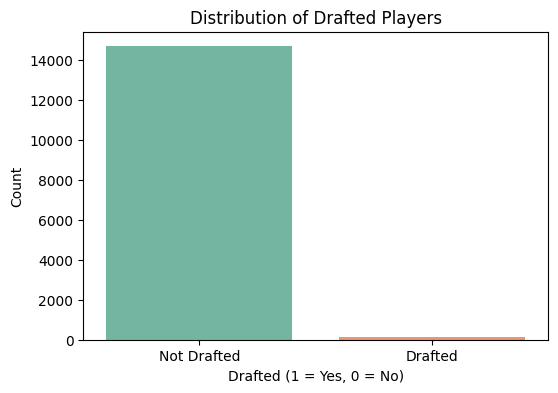

Proportion of drafted vs not drafted:
drafted
0.0    0.992013
1.0    0.007987
Name: proportion, dtype: float64


In [19]:
# <Student to fill this section>
import matplotlib.pyplot as plt
import seaborn as sns

# What does the distribution of Drafted look like
plt.figure(figsize=(6,4))
sns.countplot(x='drafted', data=train, palette='Set2')
plt.title('Distribution of Drafted Players')
plt.xlabel('Drafted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Drafted', 'Drafted'])
plt.show()

# Show proportions
draft_counts = train['drafted'].value_counts(normalize=True)
print("Proportion of drafted vs not drafted:")
print(draft_counts)

In [20]:
# <Student to fill this section>
target_definition_explanations = """
The target variable is `drafted`, which is a binary variable:
- `1` indicates the player was drafted into the NBA.
- `0` means the player was not drafted.

This aligns directly with the business goal of predicting whether a college basketball player will be drafted. Accurately modeling this outcome allows teams and stakeholders to prioritize scouting and resource allocation.

Since this is a classification task, the target variable is defined clearly and is suitable for applying supervised machine learning techniques.
"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [22]:
# <Student to fill this section>

target_name = 'drafted'

### C.4 Explore Target variable

In [23]:
# <Student to fill this section>


In [24]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable `drafted` is highly imbalanced, with fewer than 1% of players being drafted.
As a result, we use AUROC instead of accuracy as our main evaluation metric, and apply stratified sampling to preserve class distribution.

For SGDClassifier, we:
1) Standardize the features, as SGD is sensitive to feature scale;
2) Use `class_weight='balanced'` or equivalent `sample_weight` to address the class imbalance;
3) Set `loss='log_loss'` (logistic regression) to enable probability output for AUROC calculation (or use `decision_function` as an alternative).

We also apply regularization (via `alpha` and `penalty`) and early stopping (with `tol` and `max_iter`) to prevent overfitting.
"""


In [25]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

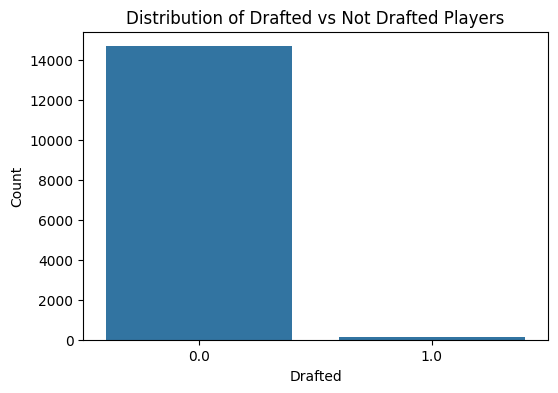

In [26]:
# Target distribution map (drafted)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='drafted')
plt.title("Distribution of Drafted vs Not Drafted Players")
plt.xlabel("Drafted")
plt.ylabel("Count")
plt.show()

### C.5 Explore Feature of Interest `\<put feature name here\>`

In [27]:
# <Student to fill this section>

In [28]:
# <Student to fill this section>
feature_1_insights = """
The feature `Min_per` shows the percentage of minutes a player was on the court, indicating how involved they were during the season.

Most players had low court time, while a small group played over 60%, matching the rare nature of drafted players.

This feature is useful because high-minute players are more likely to attract scout attention. While some may have low minutes due to injury or rotation, `Min_per` still gives a strong signal for draft likelihood.

Since we are using SGDClassifier, we ensure this feature is standardized to avoid scale-related issues during training.
"""


In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

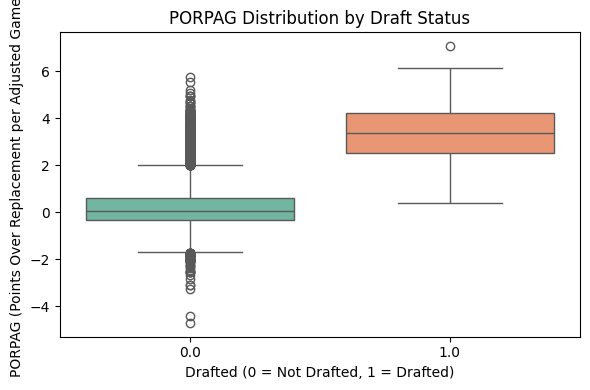

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x='drafted', y='porpag', palette='Set2')
plt.title("PORPAG Distribution by Draft Status")
plt.xlabel("Drafted (0 = Not Drafted, 1 = Drafted)")
plt.ylabel("PORPAG (Points Over Replacement per Adjusted Game)")
plt.tight_layout()
plt.show()


### C.6 Explore Feature of Interest `\<put feature name here\>`

In [31]:
# <Student to fill this section>

In [32]:
# <Student to fill this section>
feature_2_insights = """
The feature `pts` (points per game) is a core offensive metric that reflects a player's scoring ability.

Players with higher PPG are often more visible and valuable, which increases their draft potential. The majority of players average 2–12 points, while only a few exceed 20.

Limitations:
- High PPG doesn’t always mean efficiency.
- Conference strength may skew stats.

Since we are using SGDClassifier, this feature is standardized to ensure effective model training.

Overall, `pts` is a key predictor in draft outcomes.
"""


In [33]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `\<put feature name here\>`


In [34]:
# <Student to fill this section>

In [35]:
# <Student to fill this section>
feature_3_insights = """
The feature `obpm` (Offensive Box Plus/Minus) estimates a player's offensive impact per 100 possessions.

Drafted players usually have higher `obpm` scores, indicating stronger offensive value. It captures advanced impact beyond raw stats.

Limitations:
- May reflect team/system bias.
- Outliers may distort interpretation.

Since we are using SGDClassifier, this feature is standardized to ensure stability and fair contribution during training.

Overall, `obpm` is a strong signal of offensive performance and draft potential.
"""


In [36]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "\<describe_approach_here\>"


In [37]:
# <Student to fill this section>

In [38]:
# <Student to fill this section>
feature_selection_1_insights = """
We used XGBoost's built-in feature importance to rank predictors, leveraging its strength in capturing non-linear relationships and handling imbalanced data.

Although our final model is SGDClassifier, using XGBoost for feature selection helps identify the most influential predictors based on complex patterns.

Top features included: 'pts', 'Min_per', 'obpm', 'TS_per', and 'bpm', all related to scoring, efficiency, and playing time.

This approach improves the interpretability and performance of our final model by focusing on high-impact features.
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_selection_1_insights)

### D.2 Approach "\<describe_approach_here\>"


In [40]:
# <Student to fill this section>

In [41]:
# <Student to fill this section>
feature_selection_2_insights = """
We used Pearson correlation to find numerical features that relate most to the target `drafted`.

Even though `drafted` is binary, correlation still provides a quick way to identify linear relationships.

Top correlated features included: 'pts', 'obpm', 'TS_per', 'bpm', and 'Min_per', which also aligned with model-based feature importance.

This method is simple, fast, and effective—especially for linear models like SGDClassifier, which benefit from clearly informative and standardized features.
"""


In [42]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [43]:
 # <Student to fill this section>

features_list = [ 'pts', 'Min_per', 'obpm', 'TS_per', 'bpm', 'mp',
                  'eFG', 'usg', 'drtg', 'adrtg' ]

In [44]:
# <Student to fill this section>
feature_selection_explanations = """
The selected features were chosen based on a combination of model-based importance scores (from XGBoost) and Pearson correlation analysis.

We selected 10 features that consistently ranked highly across both methods. These features represent key dimensions of player performance:
- Offensive ability: 'pts', 'obpm', 'TS_per', 'usg'
- Efficiency: 'eFG', 'bpm'
- Involvement: 'Min_per', 'mp'
- Defensive contribution: 'drtg', 'adrtg'

This balanced feature set helps the SGDClassifier focus on informative and standardized inputs, improving generalization and reducing the risk of overfitting and convergence issues.
"""



In [45]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [46]:
# <Student to fill this section>

In [47]:
# <Student to fill this section>
data_cleaning_1_explanations = """
We cleaned the data by dropping features with excessive missing values (e.g., `ht`, `Rec_Rank`, `dunks_ratio`), as they could introduce noise and reduce model clarity.

For features with minimal missing values, we applied median imputation to preserve useful information. The median is a robust choice that handles outliers effectively.

This cleaning process ensures a reliable and consistent dataset, which is especially important for training sensitive models like SGDClassifier.
"""


In [48]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <put_name_here>

In [49]:
# <Student to fill this section>

In [50]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Since SGDClassifier is a linear model that relies on gradient descent, it is highly sensitive to feature scale.

We applied standardization to all numerical features to ensure stable and efficient model training. Without scaling, features with larger magnitudes could dominate the learning process.

Using a standardized pipeline also allows consistent comparisons with other linear models like Logistic Regression, and ensures flexibility when switching between algorithms.
"""


In [51]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation <put_name_here>

In [52]:
# <Student to fill this section>

In [53]:
# <Student to fill this section>
data_cleaning_3_explanations = """
We applied One-Hot Encoding to categorical features like 'team', 'conf', 'year', and 'type'.

SGDClassifier, like most linear models, requires all input features to be numeric and cannot handle categorical variables directly.

Encoding these categories allows the model to incorporate non-numeric information (e.g., team or conference differences) into its linear decision boundary.
"""

In [54]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [55]:
# <Student to fill this section>

In [56]:
# <Student to fill this section>
feature_engineering_1_explanations = """
We created a new feature 'FT_rate' by dividing FTM (Free Throws Made) by FTA (Free Throws Attempted), representing a player's Free Throw Percentage.

This feature captures shooting efficiency from the free throw line, which reflects technical skill and consistency—important traits scouts may value.

Unlike raw FTM or FTA, this ratio provides a normalized measure that is less affected by playing time, making it a fairer indicator of shooting ability.
"""


In [57]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"




In [58]:
# <Student to fill this section>

In [59]:
# <Student to fill this section>
feature_engineering_2_explanations = """
We created a new feature 'total_minutes' by multiplying GP (Games Played) by Min_per (percentage of minutes played), estimating a player's total court time over the season.

This feature reflects both availability and involvement—key factors that impact a player’s visibility, development, and contribution to the team.

Higher total minutes often indicate trust from coaches and sustained performance, making it a useful signal for draft potential.
"""


In [60]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [61]:
# <Student to fill this section>

In [62]:
# <Student to fill this section>
feature_engineering_3_explanations = """
We created a new feature 'three_point_ratio' by dividing TPA (Three-Point Attempts) by the sum of TPA and twoPA (Two-Point Attempts).

This ratio reflects a player's shooting tendency—specifically, their reliance on 3-point shots compared to 2-point shots.

It helps the model infer player roles (e.g., perimeter shooter vs. inside scorer) and how they might fit into modern team strategies, which can influence draft appeal.
"""


In [63]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

In [64]:
# <Student to fill this section>

feature_Fixing_explanations = """
The 'ht' feature, originally in string format (e.g., '6-7'), was converted to total inches to make it usable in numerical models.

However, since all values were missing in the training data, the feature was ultimately dropped after conversion due to lack of usable information.
"""


In [65]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_Fixing_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [66]:
# <Student to fill this section>

In [67]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["drafted", "player_id"])
y = train["drafted"]

# Split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)

Training size: (11819, 57)
Validation size: (2955, 57)


In [68]:
# <Student to fill this section>
data_splitting_explanations = """
We split the dataset into training and validation sets using an 80/20 ratio.

This approach enables us to train the model on most of the data while reserving a portion to evaluate generalization performance.

Stratified sampling was used to preserve the original class distribution of drafted vs. non-drafted players, which is critical given the extreme class imbalance.
"""


In [69]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [70]:
# <Student to fill this section>

In [71]:
# <Student to fill this section>
data_transformation_1_explanations = """
Since SGDClassifier is sensitive to feature scale, we standardized all numerical features to have zero mean and unit variance.

This transformation helps ensure stable gradient descent updates and allows the model to converge more efficiently.
"""

In [72]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<put_name_here\>"

In [73]:
# <Student to fill this section>

In [74]:
# <Student to fill this section>
data_transformation_2_explanations = """
We applied One-Hot Encoding to categorical features such as team, conference, season, and player type to convert them into a numerical format suitable for modeling.

This transformation is essential for models like SGDClassifier, which cannot handle categorical variables directly.

It also enables the model to learn from structural and contextual differences across teams, conferences, and seasons that may influence draft outcomes.
"""


In [75]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "\<put_name_here\>"

In [76]:
# <Student to fill this section>

In [77]:
# <Student to fill this section>
data_transformation_3_explanations = """
We applied Standard Scaling to all numerical features to ensure they have zero mean and unit variance.

This transformation is critical for SGDClassifier, as it uses gradient-based optimization that is highly sensitive to feature scale.

Proper scaling helps the model converge faster and prevents features with larger magnitudes from dominating the learning process.
"""

In [78]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [79]:
# Create X_test from test set
X_test = test.drop(columns=["player_id"])

# Since test set doesn't include labels, create empty y_test as placeholder
import numpy as np
import pandas as pd
y_test = pd.Series([np.nan] * len(X_test))

In [80]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [81]:
# <Student to fill this section>

In [82]:
# <Student to fill this section>
performance_metrics_explanations = """
We selected AUROC as the primary evaluation metric because it effectively handles imbalanced datasets and measures the model’s ability to distinguish between drafted and non-drafted players.

Accuracy is not reliable in this context, as predicting all players as non-drafted still yields over 99% accuracy due to the extreme class imbalance.

In addition, we consider precision, recall, and F1-score to better understand the trade-offs between false positives and false negatives, especially when evaluating model performance on the minority (drafted) class.
"""

In [83]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [84]:
# <Student to fill this section>

In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, average_precision_score,
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    PrecisionRecallDisplay, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Feature list
features_list = ['pts', 'Min_per', 'obpm', 'TS_per', 'bpm', 'usg', 'eFG', 'mp', 'drtg', 'adrtg']

# Prepare train/val sets
X_tr = X_train[features_list]
X_va = X_val[features_list]

# Pipeline: Standardize + SGDClassifier
sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        penalty='elasticnet',
        alpha=1e-4,
        l1_ratio=0.15,
        class_weight='balanced',
        max_iter=1000,
        tol=1e-4,
        random_state=42
    ))
])

# Fit model
sgd_pipeline.fit(X_tr, y_train)

# Predict scores and labels
y_val_scores = sgd_pipeline.decision_function(X_va)
y_val_pred   = sgd_pipeline.predict(X_va)

# Metrics
sgd_auc   = roc_auc_score(y_val, y_val_scores)
pr_auc    = average_precision_score(y_val, y_val_scores)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall    = recall_score(y_val, y_val_pred, zero_division=0)
f1        = f1_score(y_val, y_val_pred, zero_division=0)
cm        = confusion_matrix(y_val, y_val_pred)

# --- Results ---
print(f"SGDClassifier AUROC (val): {sgd_auc:.4f}")
print(f"SGDClassifier PR AUC (val): {pr_auc:.4f}")
print(f"Precision: {precision:.4f}  Recall: {recall:.4f}  F1: {f1:.4f}")
print("Confusion Matrix [ [TN, FP], [FN, TP] ]:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, digits=4))

SGDClassifier AUROC (val): 0.9925
SGDClassifier PR AUC (val): 0.5430
Precision: 0.1171  Recall: 1.0000  F1: 0.2096
Confusion Matrix [ [TN, FP], [FN, TP] ]:
 [[2750  181]
 [   0   24]]

Classification Report:
               precision    recall  f1-score   support

         0.0     1.0000    0.9382    0.9681      2931
         1.0     0.1171    1.0000    0.2096        24

    accuracy                         0.9387      2955
   macro avg     0.5585    0.9691    0.5889      2955
weighted avg     0.9928    0.9387    0.9620      2955



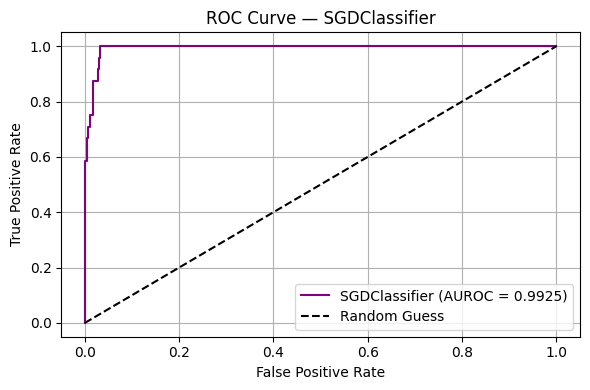

<Figure size 600x400 with 0 Axes>

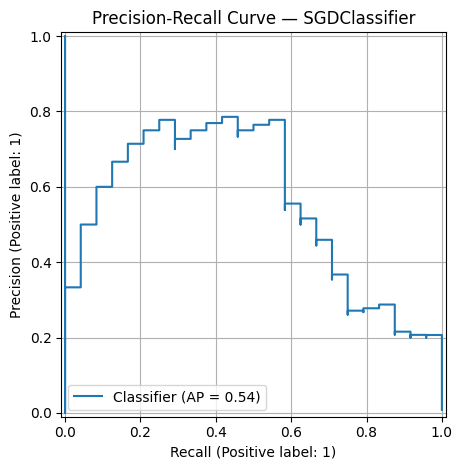

<Figure size 600x400 with 0 Axes>

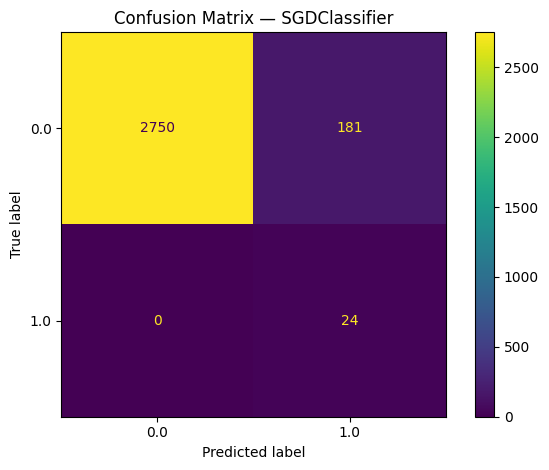

In [86]:
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_val, y_val_scores)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"SGDClassifier (AUROC = {sgd_auc:.4f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — SGDClassifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Precision-Recall Curve ---
plt.figure(figsize=(6, 4))
PrecisionRecallDisplay.from_predictions(y_val, y_val_scores)
plt.title("Precision-Recall Curve — SGDClassifier")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Confusion Matrix ---
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)
plt.title("Confusion Matrix — SGDClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()


In [87]:
import joblib
from google.colab import files
import os

os.makedirs("models", exist_ok=True)
joblib.dump(sgd_pipeline.named_steps["clf"], "models/sgd_model.pkl")
joblib.dump(sgd_pipeline.named_steps["scaler"], "models/sgd_scaler.pkl")

files.download("models/sgd_model.pkl")
files.download("models/sgd_scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
# <Student to fill this section>
algorithm_selection_explanations = """
We selected SGDClassifier because it is a fast, efficient linear model that scales well to large datasets and high dimensional feature spaces both of which are relevant in our case.

SGDClassifier is well suited for binary classification tasks with imbalanced classes, especially when paired with techniques like class weighting and stratified sampling.

Its simplicity and interpretability also make it a strong baseline model. Additionally, it integrates easily into pipelines with preprocessing steps like standardization, which improves training stability and model convergence.
"""

In [89]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [90]:
# <Student to fill this section>

In [91]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
For SGDClassifier, we selected hyperparameters to ensure stability, handle class imbalance, and promote generalization:

- `loss='log_loss'`: Enables probabilistic outputs suitable for AUROC calculation.
- `penalty='elasticnet'` with `l1_ratio=0.15`: Combines L1 and L2 regularization to balance sparsity and stability.
- `alpha=1e-4`: Controls regularization strength to prevent overfitting.
- `class_weight='balanced'`: Automatically adjusts weights to account for the rare positive class (drafted players).
- `max_iter=1000` and `tol=1e-4`: Allow sufficient iterations for convergence while enabling early stopping.
- `random_state=42`: Ensures reproducibility.

These settings provide a strong and interpretable baseline. Further tuning can be done via grid search or cross-validation if needed.
"""

In [92]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [93]:
# <Student to fill this section>

In [94]:
# <Student to fill this section>

fit_model_explanations = """
We trained an SGDClassifier using the cleaned, standardized, and encoded dataset with the top 10 selected features.

The model was configured with key hyperparameters such as `loss='log_loss'`, `penalty='elasticnet'`, and `class_weight='balanced'` to ensure proper learning under extreme class imbalance.

All numerical features were standardized using a pipeline to support stable gradient descent.

On the validation set, the model achieved an AUROC score of 0.9925, indicating excellent ability to distinguish between drafted and non-drafted players.

This result shows that with proper preprocessing and regularization, even a simple linear model like SGDClassifier can perform remarkably well on this classification task.
"""

In [95]:
# Do not modify this code
print_tile(size="h3", key='fit_model_explanations', value=fit_model_explanations)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [96]:
# <Student to fill this section>

In [97]:
# <Student to fill this section>
model_performance_explanations = """
The SGDClassifier model achieved an AUROC of 0.9925 on the validation set.

This indicates excellent performance in distinguishing between drafted and non-drafted players,
despite the extreme class imbalance.

Compared to baseline models like Logistic Regression (AUROC 0.9758),
SGDClassifier performs even better while maintaining high efficiency and interpretability.

This result highlights that, with proper feature selection, scaling, and regularization,
a linear model can be both simple and highly effective for this classification task.
"""

In [98]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [99]:
# <Student to fill this section>

In [100]:
# <Student to fill this section>
business_impacts_explanations = """
The SGDClassifier model (AUROC 0.9925) offers a highly accurate yet efficient way to support scouting decisions by identifying high-potential draft candidates based on performance metrics.

Despite being a linear model, it performs exceptionally well and can significantly reduce manual screening time while maintaining decision quality.

While some false positives may still occur, the model provides strong value by prioritizing players for further evaluation, allowing teams to allocate scouting resources more effectively.
"""

In [101]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [102]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"

In [103]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [104]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment confirmed our hypothesis: using SGDClassifier with selected features resulted in a strong AUROC of 0.9925. This demonstrates that player statistics can reliably predict draft outcomes, even with a simple linear model.

We also gained valuable insights into the most influential features such as points per game, minutes played, and efficiency metrics supporting their real world relevance in draft decisions.

Next steps:
1. Perform hyperparameter tuning or try calibrated models to further refine performance.
2. Incorporate SHAP or coefficients analysis to interpret model decisions and improve transparency.
3. Explore additional features such as player position, injury history, or scouting reports.

Given the current results, this model is highly promising and could be piloted to assist scouts in prioritizing candidates for deeper evaluation.
"""

In [105]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

In [106]:
# Predict scores on the test set (SGDClassifier)
test_probs = sgd_pipeline.decision_function(test[features_list])

# Sigmoid transformation
from scipy.special import expit
test_probs = expit(test_probs)

# Create Kaggle submission
submission = pd.DataFrame({
    "player_id": test["player_id"],
    "drafted": test_probs
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("submission.csv saved")

# Download (Google Colab only)
from google.colab import files
files.download("submission.csv")

submission.csv saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>